In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [ ]:
import nltk

In [ ]:
df=pd.read_csv("/content/British_Airways(1).csv")

In [ ]:
df.head(10)

,Name,Rating(10points),Crisp_Feedback,Full_Descripation
0,E Smyth,9,"""cabin crew excellent""",Quick bag drop at First Wing but too many pass...
1,L Keele,1,"""Service level far worse then Ryanair""",4 Hours before takeoff we received a Mail sta...
2,Austin Jones,3,"""do not upgrade members based on status""",I recently had a delay on British Airways fro...
3,M A Collie,8,"""Flight was smooth and quick""","Boarded on time, but it took ages to get to t..."
4,Nigel Dean,1,"""Absolutely hopeless airline""","5 days before the flight, we were advised by ..."
5,Gaylynne Simpson,1,"""Customer Service is non existent""",\nWe traveled to Lisbon for our dream vacatio...
6,A Narden,1,"""I can’t imagine a worst airline""",Booked a flight from Bucharest to Manchester ...
7,Graeme Boothman,8,"""sufficient leg and arm room""",Booked online months ago and the only hitch w...
8,R Vines,7,“crew were polite”,The flight was on time. The crew were polite....
9,Massimo Tricca,2,"""Angry, disappointed, and unsatisfied""","Angry, disappointed, and unsatisfied. My rout..."


In [ ]:
df.sample(10)

,Name,Rating(10points),Crisp_Feedback,Full_Descripation
250,Hans Book,1,"""Luggage is delayed""","The staff are friendly. The plane was cold, we..."
134,A Garlen,3,"""Most uncomfortable flight""",Most uncomfortable flight I have ever experie...
109,S Carlsen,1,"""Shocking customer service""",We arrived at Heathrow at 0600 to find our fl...
43,E Anderson,1,"""the service was shockingly bad""",One of the worst experiences on the worst airl...
111,Carlos Whilhelm,3,"""Boarding was chaotic""",Airport check in was functionary with little ...
35,Kane Kelly,1,"""British Airways was absolutely shocking""",Booked a very special holiday for me and my p...
234,S Anderson,10,"""crew are a credit to BA""",Organised boarding process. Really friendly cr...
6,A Narden,1,"""I can’t imagine a worst airline""",Booked a flight from Bucharest to Manchester ...
71,M Morris,1,"""still waiting for reimbursement""",BA cancelled our flight and could not book us...
233,Maria del Carmen Riesco Martin,10,"""so determined to help""",My husband and myself were flying to Madrid o...


In [ ]:
df.shape

(260, 4)

# **Quick EDA**

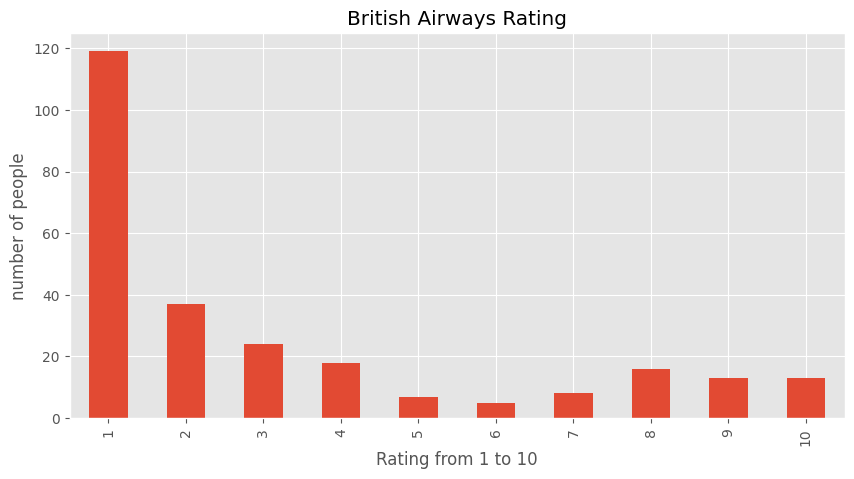

In [ ]:
ax=df['Rating(10points)'].value_counts().sort_index().plot(kind="bar",
title="British Airways Rating",
figsize=(10,5)
)
ax.set_xlabel("Rating from 1 to 10")
ax.set_ylabel("number of people")
plt.show()

##Basic NLTK


In [ ]:
example=df["Full_Descripation"][150]
print(example)

Easy check in on the way to Heathrow. The flight was on time with no issues. Our return flight to Valencia was booked for the afternoon and our long haul flight arrived early at Heathrow. This was with another airline and was not a connecting flight. I asked at the British Airways check in if we could be put onto the morning flight back to Valencia to avoid seven hours waiting at Heathrow. We had our flights changed with no cost and were checked in within five minutes. That is indeed customer service. Thank you.


In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
tokens=nltk.word_tokenize(example)
tokens[:10]
tagged=nltk.pos_tag(tokens)
tagged[:10]

[('Easy', 'JJ'),
 ('check', 'NN'),
 ('in', 'IN'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('Heathrow', 'NNP'),
 ('.', '.'),
 ('The', 'DT')]

In [ ]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE Easy/JJ)
  check/NN
  in/IN
  on/IN
  the/DT
  way/NN
  to/TO
  (GPE Heathrow/NNP)
  ./.
  The/DT
  flight/NN
  was/VBD
  on/IN
  time/NN
  with/IN
  no/DT
  issues/NNS
  ./.
  Our/PRP$
  return/NN
  flight/NN
  to/TO
  (PERSON Valencia/NNP)
  was/VBD
  booked/VBN
  for/IN
  the/DT
  afternoon/NN
  and/CC
  our/PRP$
  long/JJ
  haul/NN
  flight/NN
  arrived/VBD
  early/RB
  at/IN
  (ORGANIZATION Heathrow/NNP)
  ./.
  This/DT
  was/VBD
  with/IN
  another/DT
  airline/NN
  and/CC
  was/VBD
  not/RB
  a/DT
  connecting/NN
  flight/NN
  ./.
  I/PRP
  asked/VBD
  at/IN
  the/DT
  (GPE British/JJ)
  Airways/NNP
  check/NN
  in/IN
  if/IN
  we/PRP
  could/MD
  be/VB
  put/VBN
  onto/IN
  the/DT
  morning/NN
  flight/NN
  back/RB
  to/TO
  (GPE Valencia/NNP)
  to/TO
  avoid/VB
  seven/CD
  hours/NNS
  waiting/VBG
  at/IN
  (ORGANIZATION Heathrow/NNP)
  ./.
  We/PRP
  had/VBD
  our/PRP$
  flights/NNS
  changed/VBN
  with/IN
  no/DT
  cost/NN
  and/CC
  were/VBD
  checked/VBN
  in/IN


##VADER Sentiment Score

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [ ]:
sia=SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores("I am feel so happy today")

{'neg': 0.0, 'neu': 0.458, 'pos': 0.542, 'compound': 0.6948}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.066, 'neu': 0.88, 'pos': 0.054, 'compound': -0.0516}

In [ ]:
res={}
for i,rows in tqdm(df.iterrows(),total=len(df)):
    text=rows['Full_Descripation']
    myname=rows['Name']
    res[myname]=sia.polarity_scores(text)


  0%|          | 0/260 [00:00<?, ?it/s]

In [ ]:
res

{'E Smyth': {'neg': 0.019, 'neu': 0.72, 'pos': 0.261, 'compound': 0.9612},
 'L Keele': {'neg': 0.185, 'neu': 0.744, 'pos': 0.071, 'compound': -0.9342},
 'Austin Jones': {'neg': 0.136, 'neu': 0.783, 'pos': 0.081, 'compound': -0.85},
 'M A Collie': {'neg': 0.0, 'neu': 0.931, 'pos': 0.069, 'compound': 0.5927},
 'Nigel Dean': {'neg': 0.102, 'neu': 0.833, 'pos': 0.066, 'compound': -0.8327},
 'Gaylynne Simpson': {'neg': 0.013,
  'neu': 0.922,
  'pos': 0.065,
  'compound': 0.8392},
 'A Narden': {'neg': 0.126, 'neu': 0.815, 'pos': 0.059, 'compound': -0.7269},
 'Graeme Boothman': {'neg': 0.08,
  'neu': 0.825,
  'pos': 0.096,
  'compound': 0.5956},
 'R Vines': {'neg': 0.047, 'neu': 0.817, 'pos': 0.135, 'compound': 0.9657},
 'Massimo Tricca': {'neg': 0.104,
  'neu': 0.811,
  'pos': 0.085,
  'compound': -0.4118},
 'J Kaye': {'neg': 0.058, 'neu': 0.885, 'pos': 0.057, 'compound': -0.0989},
 'M Collie': {'neg': 0.175, 'neu': 0.779, 'pos': 0.046, 'compound': -0.6042},
 'J Furlong': {'neg': 0.117, 'neu

In [ ]:
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'Name'})
vaders=vaders.merge(df,on='Name',how='left')
vaders.head(20)

,Name,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,Rating(10points),Crisp_Feedback,Full_Descripation
0,E Smyth,0.019,0.720,0.261,0.9612,0.009216,0.091631,0.899153,9,"""cabin crew excellent""",Quick bag drop at First Wing but too many pass...
1,E Smyth,0.019,0.720,0.261,0.9612,0.009216,0.091631,0.899153,8,"""Cabin crew were all fantastic""",Easy check in a T5. Galleries south and North...
2,E Smyth,0.019,0.720,0.261,0.9612,0.009216,0.091631,0.899153,9,"""Service was good""",Busy day at LHR and flight full. Lounge crowd...
3,E Smyth,0.019,0.720,0.261,0.9612,0.009216,0.091631,0.899153,9,"""Sound dinner service""",Good lounge at Cape Town. On time departure. D...
4,E Smyth,0.019,0.720,0.261,0.9612,0.009216,0.091631,0.899153,9,"""a good drinks and food service""",Easy check in and staff member was polite and ...
5,L Keele,0.185,0.744,0.071,-0.9342,0.893910,0.094860,0.011229,1,"""Service level far worse then Ryanair""",4 Hours before takeoff we received a Mail sta...
6,Austin Jones,0.136,0.783,0.081,-0.8500,0.912654,0.078605,0.008741,3,"""do not upgrade members based on status""",I recently had a delay on British Airways fro...
7,M A Collie,0.000,0.931,0.069,0.5927,0.029435,0.231118,0.739448,8,"""Flight was smooth and quick""","Boarded on time, but it took ages to get to t..."
8,Nigel Dean,0.102,0.833,0.066,-0.8327,0.853846,0.129666,0.016489,1,"""Absolutely hopeless airline""","5 days before the flight, we were advised by ..."
9,Gaylynne Simpson,0.013,0.922,0.065,0.8392,0.905410,0.083411,0.011179,1,"""Customer Service is non existent""",\nWe traveled to Lisbon for our dream vacatio...


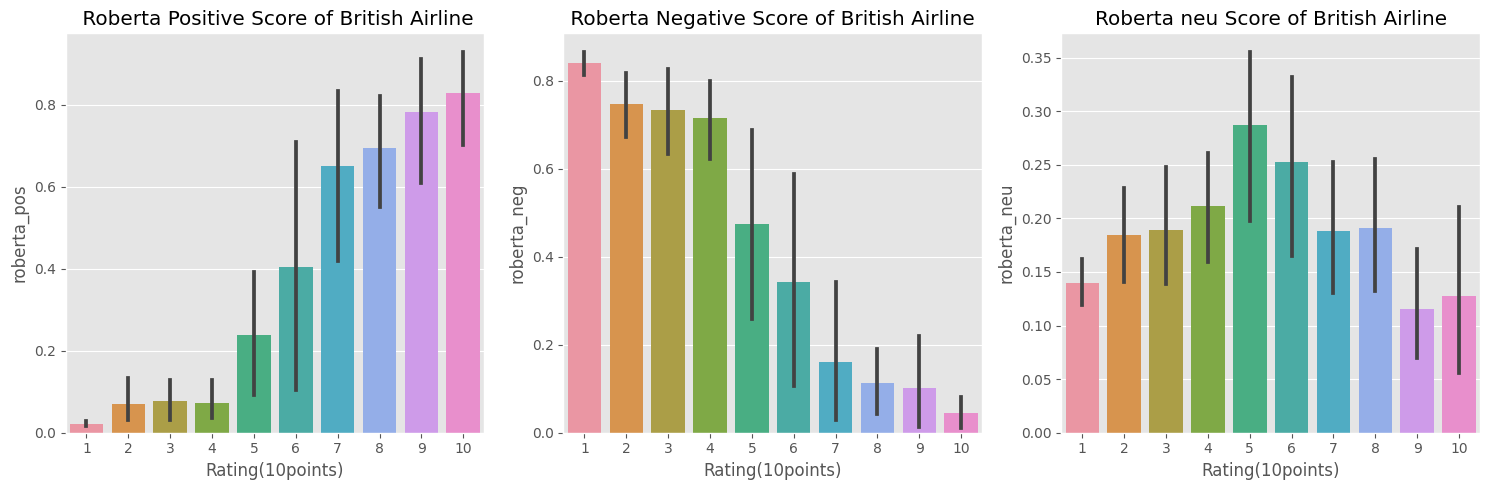

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'vaders' is your DataFrame

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Bar plot for 'pos'
sns.barplot(data=vaders, x='Rating(10points)', y='roberta_pos', ax=axs[0])
axs[0].set_title(' Roberta Positive Score of British Airline')

# Bar plot for 'neg'
sns.barplot(data=vaders, x='Rating(10points)', y='roberta_neg', ax=axs[1])
axs[1].set_title(' Roberta Negative Score of British Airline ')

# Bar plot for 'compound'
sns.barplot(data=vaders, x='Rating(10points)', y='roberta_neu', ax=axs[2])
axs[2].set_title('Roberta neu Score of British Airline')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
!pip install transformers

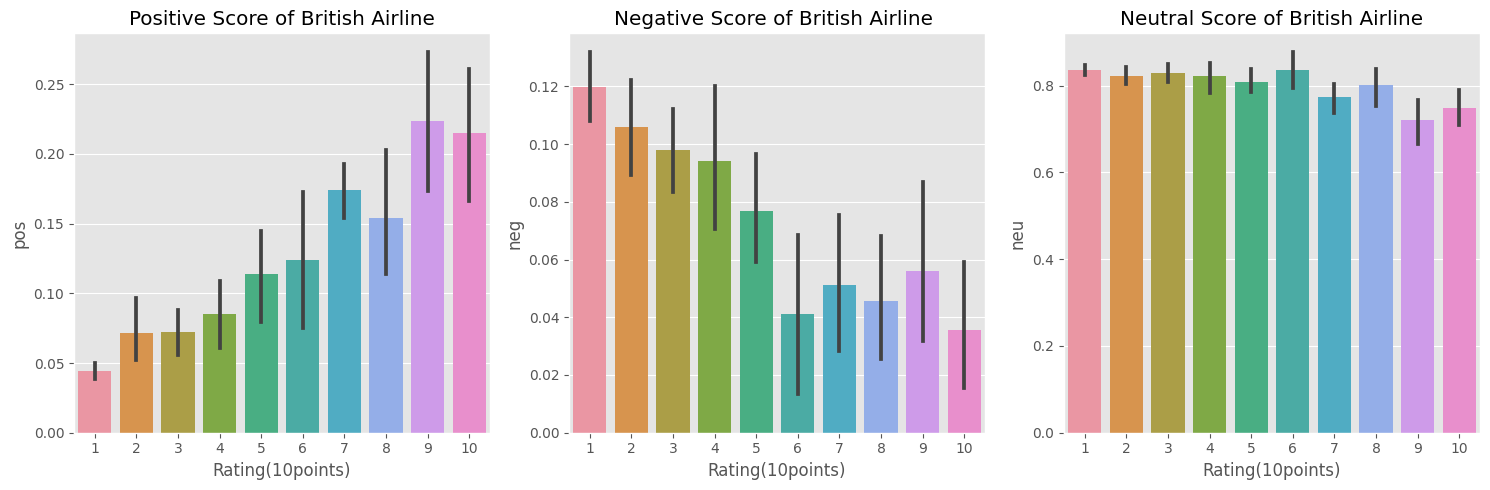

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'vaders' is your DataFrame

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Bar plot for 'pos'
sns.barplot(data=vaders, x='Rating(10points)', y='pos', ax=axs[0])
axs[0].set_title('Positive Score of British Airline')

# Bar plot for 'neg'
sns.barplot(data=vaders, x='Rating(10points)', y='neg', ax=axs[1])
axs[1].set_title('Negative Score of British Airline ')

# Bar plot for 'compound'
sns.barplot(data=vaders, x='Rating(10points)', y='neu', ax=axs[2])
axs[2].set_title('Neutral Score of British Airline')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Install scipy (if not already installed)
!pip install scipy

# Import softmax from scipy.special


In [ ]:
from transformers import AutoTokenizer,AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL=f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
print(example)
sia.polarity_scores(example)

Easy check in on the way to Heathrow. The flight was on time with no issues. Our return flight to Valencia was booked for the afternoon and our long haul flight arrived early at Heathrow. This was with another airline and was not a connecting flight. I asked at the British Airways check in if we could be put onto the morning flight back to Valencia to avoid seven hours waiting at Heathrow. We had our flights changed with no cost and were checked in within five minutes. That is indeed customer service. Thank you.


{'neg': 0.066, 'neu': 0.88, 'pos': 0.054, 'compound': -0.0516}

In [ ]:
#Run the roberta model
encoded_text=tokenizer(example,return_tensors='pt')
output=model(**encoded_text)
# print(output)
scores=output[0][0].detach().numpy()
scores=softmax(scores)
scores_dic={
    'roberta_pos':scores[0],
    'roberta_neu':scores[1],
    'roberta_neg':scores[2]
}
print(scores_dic)

{'roberta_pos': 0.013753489, 'roberta_neu': 0.115546525, 'roberta_neg': 0.87070006}


In [ ]:
def polarity_scores_roberta(example):
    encoded_text=tokenizer(example,return_tensors='pt')
    output=model(**encoded_text)
    scores=output[0][0].detach().numpy()
    scores=softmax(scores)
    scores_dic={
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2]
    }
    return scores_dic

In [ ]:
res={}
for i,rows in tqdm(df.iterrows(),total=len(df)):
    try:
        text=rows['Full_Descripation']
        myname=rows['Name']
        vader_result=sia.polarity_scores(text)
        roberta_result=polarity_scores_roberta(text)
        both={**vader_result,**roberta_result}
        res[myname]=both
    except RuntimeError:
          print(f"broken for name {myname}")

  0%|          | 0/260 [00:00<?, ?it/s]

broken for name Kane Kelly
broken for name S Palenski
broken for name Andrew Peachey
broken for name K Pickering
broken for name B Sherry
broken for name A Ahmed
broken for name R Worton
broken for name C Barton
broken for name G Jackson
broken for name D Bartul


In [ ]:
both

{'neg': 0.074,
 'neu': 0.877,
 'pos': 0.049,
 'compound': -0.5037,
 'roberta_neg': 0.90970063,
 'roberta_neu': 0.07825646,
 'roberta_pos': 0.012042935}

In [ ]:
result_df=pd.DataFrame(res).T
result_df

,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos
E Smyth,0.019,0.720,0.261,0.9612,0.009216,0.091631,0.899153
L Keele,0.185,0.744,0.071,-0.9342,0.893910,0.094860,0.011229
Austin Jones,0.136,0.783,0.081,-0.8500,0.912654,0.078605,0.008741
M A Collie,0.000,0.931,0.069,0.5927,0.029435,0.231118,0.739448
Nigel Dean,0.102,0.833,0.066,-0.8327,0.853846,0.129666,0.016489
...,...,...,...,...,...,...,...
R Heale,0.016,0.863,0.121,0.8074,0.065029,0.238366,0.696605
J Robins,0.070,0.757,0.173,0.9574,0.563624,0.330903,0.105473
Stephen Segar,0.108,0.748,0.144,0.6165,0.679992,0.258373,0.061635
J Meares,0.134,0.782,0.084,-0.8250,0.695874,0.231893,0.072234


In [ ]:
result_df=pd.merge(df,result_df,on='Name',how='inner')
result_df



KeyError: ignored

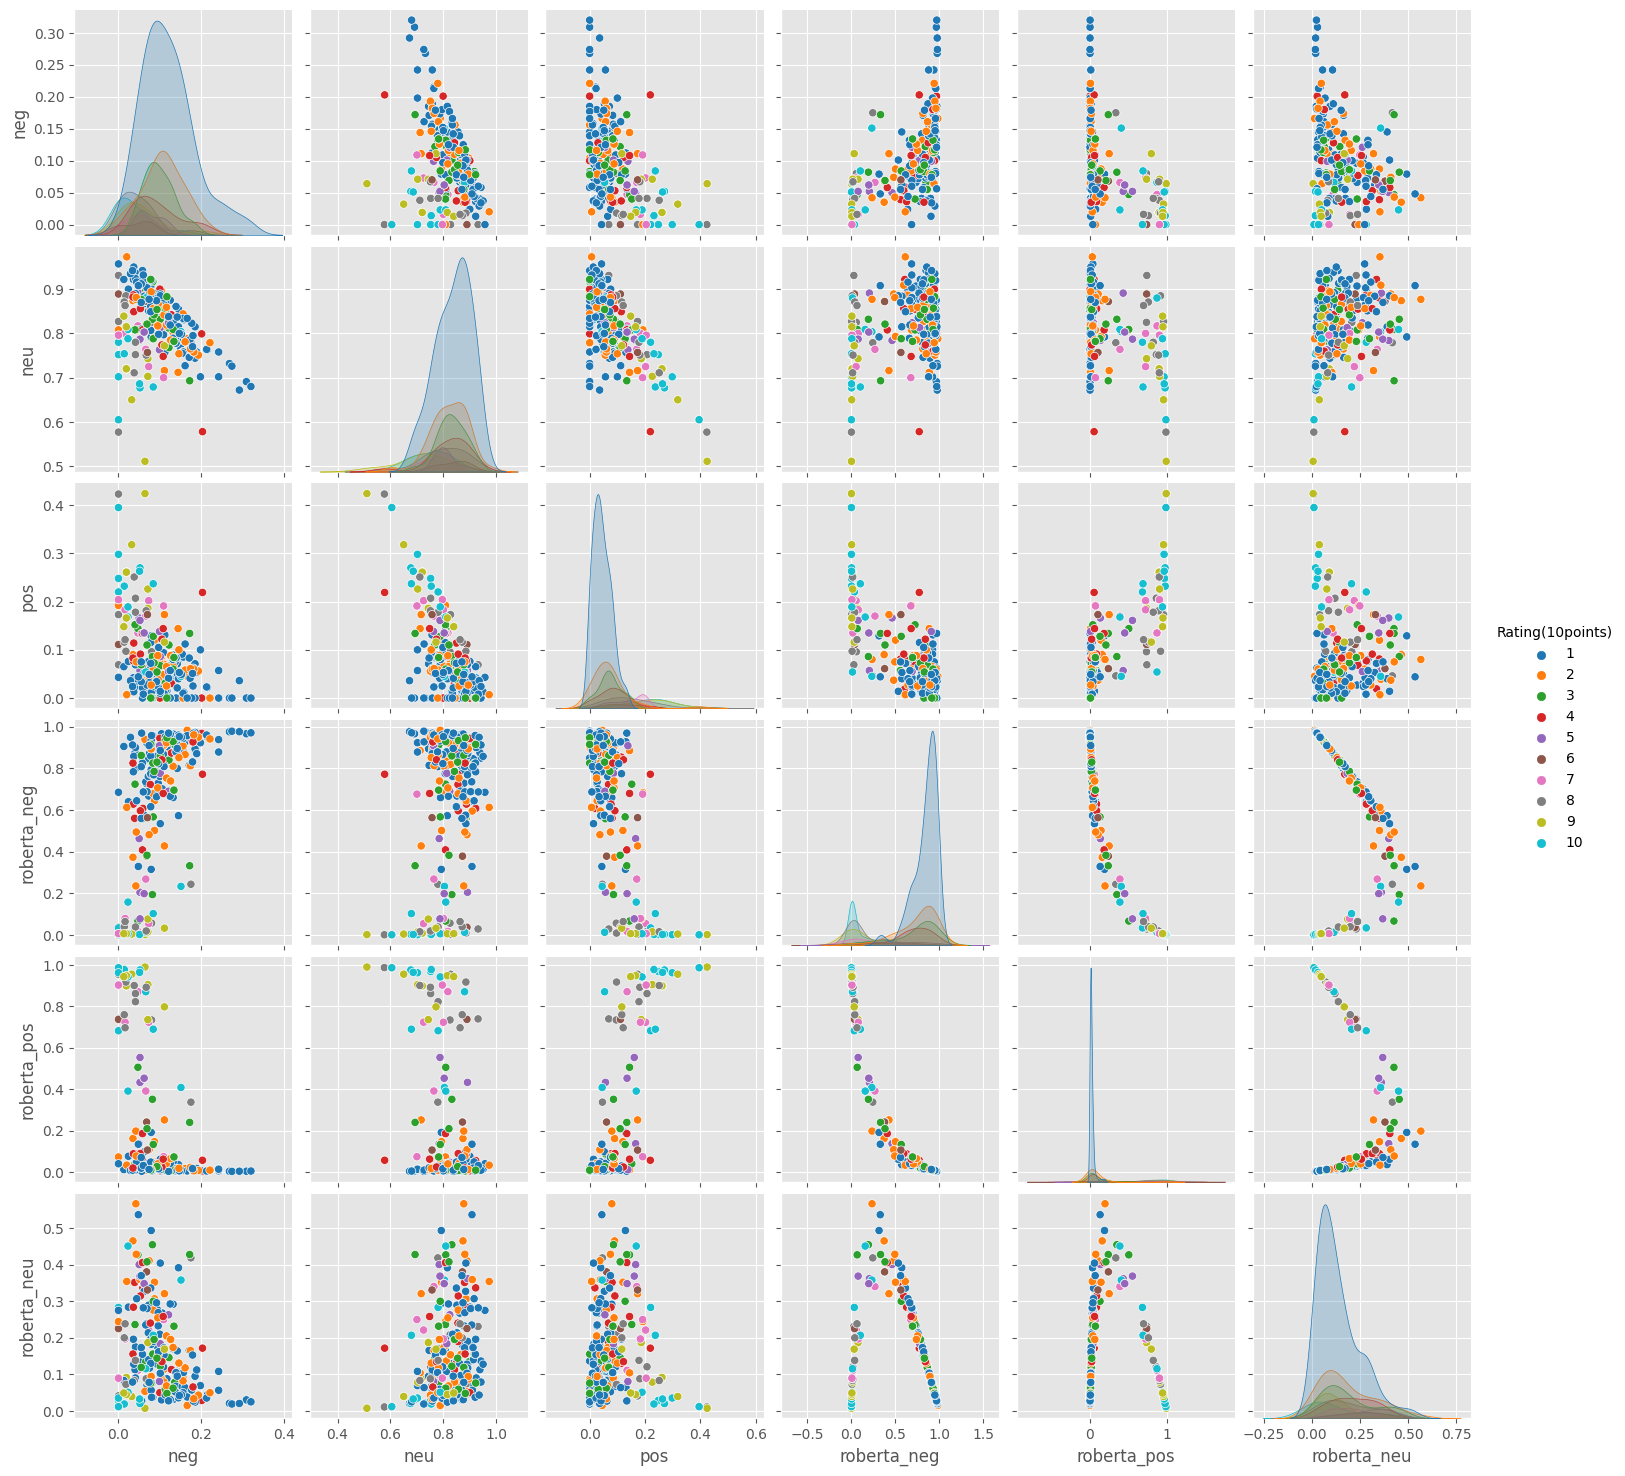

In [ ]:
sns.pairplot(data=vaders,vars=['neg','neu','pos','roberta_neg','roberta_pos','roberta_neu'],hue='Rating(10points)',palette='tab10')
plt.show()